# Phase 2: Data Explorations

- How many rows and how many columns?
- What is the meaning of each row?
- Are there duplicated rows?
- What is the meaning of each column?
- What is the current data type of each column? Are there columns having
inappropriate data types?
- With each numerical column, how are values distributed?
    - What is the percentage ofmissing values?
    - Min? max? Are they abnormal?
- With each categorical column, how are values distributed?
    - What is the percentage of missing values?
    - How many different values? Show a few Are they abnormal?

### 1. Tiền xử lý

Bước 1

In [1]:
import sys  
sys.path.insert(0, '../phase_1_data_collection')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipynb.fs.full.data_collection import df_titles_raw

Bước 2

In [3]:
df_titles_raw.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


day la markdown

In [4]:
num_duplicate_data = df_titles_raw.duplicated().sum()
num_duplicate_data

35

day la markdown

In [6]:
df_titles = df_titles_raw.drop_duplicates()

day la markdown

In [7]:
num_rows, num_cols = df_titles.shape
num_rows, num_cols

(18980, 15)

day la markdown

In [8]:
df_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

day la markdown

In [9]:
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18980 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    18980 non-null  object 
 1   title                 18979 non-null  object 
 2   type                  18980 non-null  object 
 3   description           18831 non-null  object 
 4   release_year          18980 non-null  int64  
 5   age_certification     8684 non-null   object 
 6   runtime               18980 non-null  int64  
 7   genres                18980 non-null  object 
 8   production_countries  18980 non-null  object 
 9   seasons               4208 non-null   float64
 10  imdb_id               17586 non-null  object 
 11  imdb_score            17107 non-null  float64
 12  imdb_votes            17070 non-null  float64
 13  tmdb_popularity       18310 non-null  float64
 14  tmdb_score            16324 non-null  float64
dtypes: float64(5), int64

day la markdown

In [10]:
df_titles.isnull().sum()

id                          0
title                       1
type                        0
description               149
release_year                0
age_certification       10296
runtime                     0
genres                      0
production_countries        0
seasons                 14772
imdb_id                  1394
imdb_score               1873
imdb_votes               1910
tmdb_popularity           670
tmdb_score               2656
dtype: int64

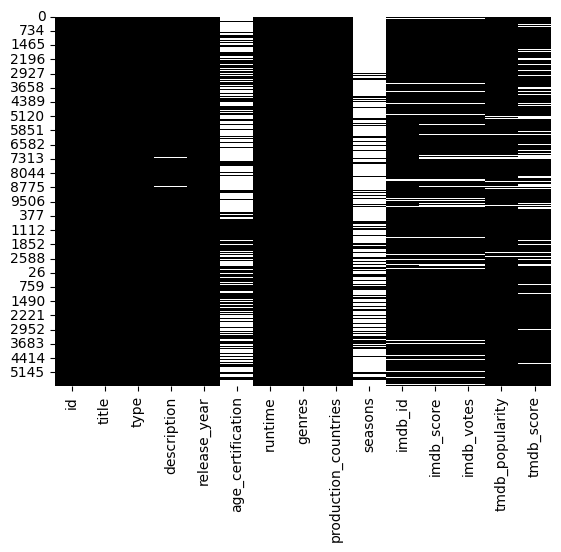

In [11]:
sns.heatmap(df_titles.isnull(), cmap='gray', cbar=False);

1. title

In [12]:
df_titles['title'].value_counts()

A Nightmare on Elm Street             4
The Gift                              4
The Outsider                          4
Shadows                               4
Dostana                               4
                                     ..
Dismissed                             1
Human Flow                            1
Warriors of Liberty City              1
Scales: Mermaids Are Real             1
Mighty Little Bheem: Kite Festival    1
Name: title, Length: 18357, dtype: int64

2. type

In [13]:
df_titles['type'].value_counts()

MOVIE    14772
SHOW      4208
Name: type, dtype: int64

3. release_year

In [14]:
df_titles['release_year'].value_counts()

2021    1901
2019    1837
2020    1767
2018    1597
2017    1250
        ... 
1912       1
1904       1
1909       1
1903       1
1901       1
Name: release_year, Length: 116, dtype: int64